<a href="https://colab.research.google.com/github/CherylA24/CannyEdgeDetector/blob/main/CannyEdgeDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Necessary Library
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Function Show Image
def showImage(img, desc):
  plt.figure(figsize=(7,7))
  plt.imshow(img, cmap="gray")
  plt.title(desc)
  plt.show()

In [ ]:
# Load Image
input_img = cv.imread("test.jpeg")
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

**1. Noise Reduction with Gaussian Blur**



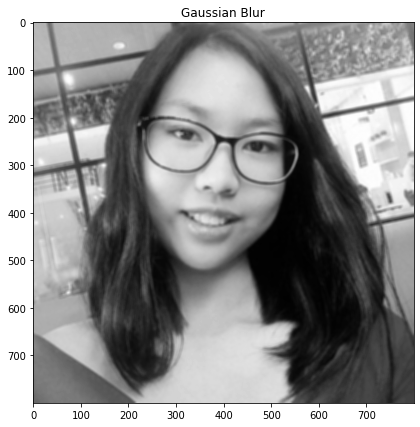

In [ ]:
# Noise Reduction with Gaussian Blur

gaussian_img = cv.GaussianBlur(gray_img, (7,7), 5)

showImage(gaussian_img, "Gaussian Blur")

**2. Gradient Calculation**

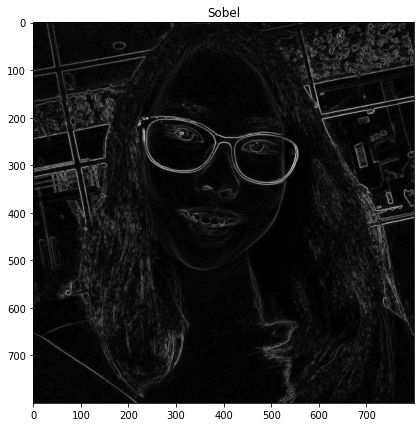

In [ ]:
# Gradient Calculation with Sobel Filter

g_x = cv.Sobel(gray_img, cv.CV_64FC1, 1, 0)
g_y = cv.Sobel(gray_img, cv.CV_64FC1, 0, 1)

gradient = np.sqrt(np.square(g_x) + np.square(g_y))
gradient *= 255.0 / merge_sobel.max()

theta = np.arctan2(g_y, g_x)

showImage(gradient, "Sobel")

**3. Non-Max Suppression**

In [ ]:
# Step 3: Non-Maximum Suppression

def non_max_suppression(gradient, theta):
  x, y = gradient.shape
  z = np.zeros((x,y), dtype=np.int32)
  angle = theta * 180. / np.pi
  angle[angle < 0] += 180

  for i in range(1, x-1):
    for j in range(1, y-1):

      q = 255
      r = 255

      if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
        q = gradient[i, j+1]
        r = gradient[i, j-1]
      elif (22.5 <= angle[i,j] < 67.5):
        q = gradient[i+1, j-1]
        r = gradient[i-1, j+1]
      elif (67.5 <= angle[i,j] < 112.5):
        q = gradient[i+1, j]
        r = gradient[i-1, j]
      elif (112.5 <= angle[i,j] < 157.5):
        q = gradient[i-1, j-1]
        r = gradient[i+1, j+1]
      
      if (gradient[i,j] >= q) and (gradient[i,j] >= r):
        z[i,j] = gradient[i,j]
      else:
        z[i,j] = 0
  return z

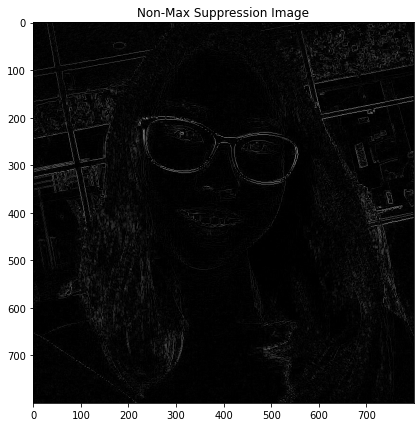

In [ ]:
nms_img = non_max_suppression(gradient, theta)
showImage(nms_img, "Non-Max Suppression Image")

**4**. **Double** **Threshold**

In [ ]:
# Double Threshold
def threshold(img, lowThresholdRatio=0.05, highThresholdRatio=0.09):
  highThreshold = img.max() * highThresholdRatio;
  lowThreshold = highThreshold * lowThresholdRatio;
  
  x, y = img.shape
  res = np.zeros((x,y), dtype=np.int32)
  
  weak = np.int32(25)
  strong = np.int32(255)

  strong_i, strong_j = np.where(img >= highThreshold)
  zeros_i, zeros_j = np.where(img < lowThreshold)

  weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))

  res[strong_i, strong_j] = strong
  res[weak_i, weak_j] = weak

  return (res, weak, strong)

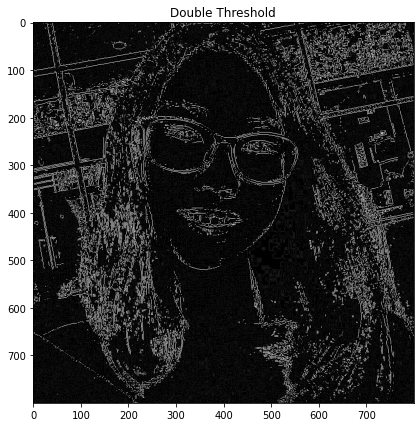

In [ ]:
dthreshold_img, weak, strong = threshold(nms_img)
showImage(dthreshold_img, "Double Threshold")

**5**. **Hysteresis**

In [ ]:
def hysteresis(img, weak, strong=255):
  row, col = img.shape 
  for i in range(1, row-1):
    for j in range(1, col-1):
      if (img[i,j] == weak):
        try:
          if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or
              (img[i+1, j+1] == strong) or (img[i, j-1] == strong) or (img[i, j+1] == strong)
              or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
            img[i, j] = strong
          else:
            img[i, j] = 0
        except IndexError as e:
          pass
  return img

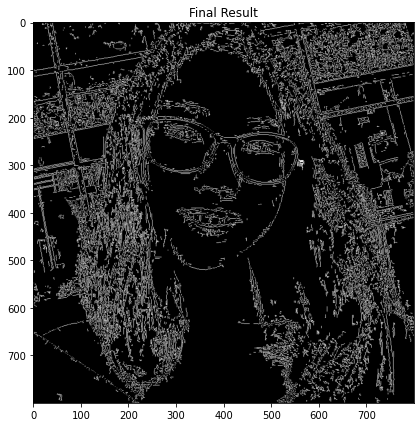

In [ ]:
final_img = hysteresis(dthreshold_img,weak,strong)
showImage(final_img, "Final Result")